# Demand per Quarter
To get the total demand per quarter, I'll average the demand per hour and then sum the hours to get total demand for the quarter.

In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
df_states = [pd.read_csv(f'../data/Australia/totaldemand_{s}.csv') for s in ['nsw', 'vic', 'qld', 'sa']]
df = pd.concat(df_states)
df.columns = [c.lower() for c in df.columns]

# Dates are in mixed format
def parse_date(value: str):
    try:
        result = datetime.strptime(value, '%d/%m/%Y %H:%M')
    except ValueError:
        result = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
    return result

df['datetime'] = df['datetime'].apply(parse_date)
df

,datetime,totaldemand,regionid
0,2010-01-01 00:00:00,8038.00,NSW1
1,2010-01-01 00:30:00,7809.31,NSW1
2,2010-01-01 01:00:00,7483.69,NSW1
3,2010-01-01 01:30:00,7117.23,NSW1
4,2010-01-01 02:00:00,6812.03,NSW1
...,...,...,...
196507,2021-03-17 22:00:00,1277.91,SA1
196508,2021-03-17 22:30:00,1226.81,SA1
196509,2021-03-17 23:00:00,1202.62,SA1
196510,2021-03-17 23:30:00,1194.34,SA1


<Axes: xlabel='datetime', ylabel='totaldemand'>

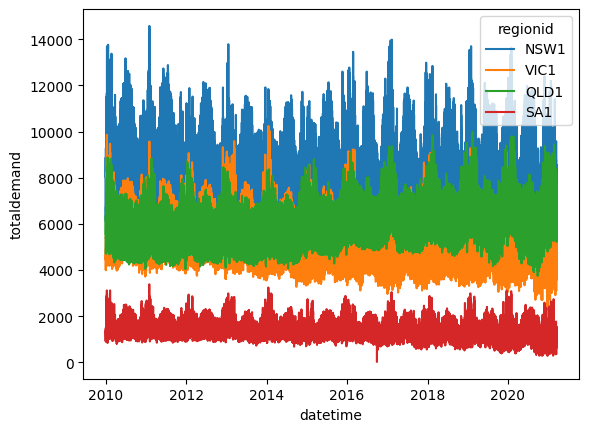

In [4]:
sns.lineplot(data=df, x='datetime', y='totaldemand', hue='regionid')

## Get hourly average data
Get hourly average data and pivot it to show the state demands in different columns. Then we can see if there is any missing date for any states.

In [5]:
df['datetime'] = df['datetime'].apply(lambda x: x.replace(minute=0))
df_hourly = df.groupby(['datetime', 'regionid']).mean()
df_hourly

totaldemand
datetime            regionid             
2010-01-01 00:00:00 NSW1         7923.655
                    QLD1         5491.730
                    SA1          1385.230
                    VIC1         5268.570
2010-01-01 01:00:00 NSW1         7300.460
...                                   ...
2021-03-17 23:00:00 VIC1         4547.735
2021-03-18 00:00:00 NSW1         7094.510
                    QLD1         5737.030
                    SA1          1340.580
                    VIC1         4608.850

[393028 rows x 1 columns]

In [6]:
df_hourly = df_hourly.reset_index().pivot(index='datetime', columns='regionid', values='totaldemand').reset_index()
df_hourly

regionid,datetime,NSW1,QLD1,SA1,VIC1
0,2010-01-01 00:00:00,7923.655,5491.730,1385.230,5268.570
1,2010-01-01 01:00:00,7300.460,5251.340,1299.460,5121.715
2,2010-01-01 02:00:00,6678.180,4987.785,1165.215,4921.165
3,2010-01-01 03:00:00,6330.085,4824.440,1098.115,4569.165
4,2010-01-01 04:00:00,6229.900,4803.995,1073.555,4436.905
...,...,...,...,...,...
98252,2021-03-17 20:00:00,7865.940,7138.820,1476.220,5247.335
98253,2021-03-17 21:00:00,7532.050,6773.015,1369.365,4832.390
98254,2021-03-17 22:00:00,7418.840,6354.125,1252.360,4521.755
98255,2021-03-17 23:00:00,7229.855,6020.900,1198.480,4547.735


In [7]:
# Find NA values
df.isnull().values.any()

False

In [8]:
def trunc_month(value: datetime):
    return datetime(value.year, value.month, 1)

def trunc_quarter(value: datetime):
    return datetime(value.year, (value.month - 1) // 3 * 3 + 1, 1)

df_hourly['quarter'] = df_hourly['datetime'].apply(trunc_quarter)
df_quarter = df_hourly.groupby('quarter').sum(numeric_only=True).reset_index()
df_quarter

regionid,quarter,NSW1,QLD1,SA1,VIC1
0,2010-01-01,1.930438e+07,1.387262e+07,3420672.275,1.264189e+07
1,2010-04-01,1.933049e+07,1.282398e+07,3313430.625,1.277977e+07
2,2010-07-01,2.024915e+07,1.274456e+07,3630312.650,1.358699e+07
3,2010-10-01,1.826692e+07,1.288339e+07,3189407.285,1.217518e+07
4,2011-01-01,1.917472e+07,1.335724e+07,3415696.650,1.227026e+07
5,2011-04-01,1.946441e+07,1.239584e+07,3281666.390,1.268836e+07
6,2011-07-01,1.990877e+07,1.240053e+07,3302887.415,1.300405e+07
7,2011-10-01,1.791196e+07,1.295304e+07,3092790.785,1.217936e+07
8,2012-01-01,1.806444e+07,1.342357e+07,3310734.655,1.238992e+07
9,2012-04-01,1.874786e+07,1.236998e+07,3287144.605,1.260631e+07


<Axes: xlabel='quarter', ylabel='demand'>

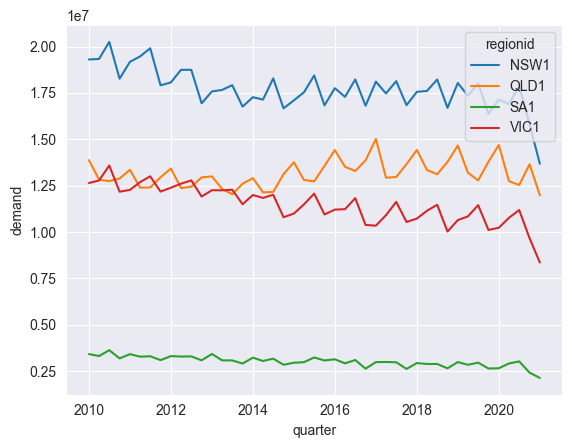

In [9]:
df_stacked = df_quarter.set_index('quarter').stack().reset_index()
df_stacked.columns = ['quarter', 'regionid', 'demand']
sns.set_style("darkgrid")
sns.lineplot(data=df_stacked, x='quarter', y='demand', hue='regionid')

## Find weighted average by state demand

### Note: Weighted average is not required because this is the demand dataset, so data is already weighted by demand.

In [11]:
df_quarter['total_demand'] = df_quarter.sum(axis=1, numeric_only=True)
df_quarter = df_quarter[['quarter', 'total_demand']]
df_quarter.to_csv('../data/transformed/total_demand.csv', index=False)
df_quarter

/var/folders/yx/hff3xdtx77d5v94h37cl3pjw0000gn/T/ipykernel_4009/2026204690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarter['total_demand'] = df_quarter.sum(axis=1, numeric_only=True)


0     49239.561285
1     48247.671020
2     50211.015415
3     46514.896770
4     48217.913165
5     47830.283505
6     48616.230635
7     46137.155500
8     47188.663110
9     47011.290315
10    47265.632335
11    44883.583470
12    46260.200215
13    45318.185115
14    45310.078965
15    43773.951395
16    45397.804120
17    44165.717935
18    45631.896925
19    43431.682425
20    44809.031095
21    44813.067370
22    46485.333255
23    44420.746580
24    46522.035500
25    44955.022240
26    46444.310880
27    43689.492055
28    46455.202225
29    44302.363680
30    45706.380995
31    43660.453740
32    45642.401285
33    44982.003655
34    45694.022870
35    43150.248295
36    46330.705490
37    44227.126715
38    45208.703310
39    42916.303020
40    44723.503355
41    43321.142345
42    44607.685650
43    41565.582025
44    36153.608610
Name: total_demand, dtype: float64

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
df_quarter

regionid,quarter,total_demand
0,2010-01-01,"49,239,561.28"
1,2010-04-01,"48,247,671.02"
2,2010-07-01,"50,211,015.41"
3,2010-10-01,"46,514,896.77"
4,2011-01-01,"48,217,913.16"
5,2011-04-01,"47,830,283.50"
6,2011-07-01,"48,616,230.64"
7,2011-10-01,"46,137,155.50"
8,2012-01-01,"47,188,663.11"
9,2012-04-01,"47,011,290.31"
